In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numdifftools.fornberg import fd_weights_all
# from math import factorial
from scipy.special import factorial

In [16]:
def vectorized_taylor_fractional_delay(Q, delta, order):
    stencil_points = np.arange(-order//2, order//2+1)
    Q = np.asarray(Q).flatten()
    x = np.array(stencil_points)
    weights_matrix = fd_weights_all(x, x0=0, n=order)  # Shape: (N+1, len(stencil))
    
    num_samples = len(Q)
    Q_shifted = np.zeros(num_samples)
    max_offset = int(max(abs(x)))
    
    Q_padded = np.pad(Q, (max_offset, max_offset), mode='constant', constant_values=0)
    indices_matrix = (np.arange(num_samples)[:, None] + x[None, :] + max_offset)
    samples_matrix = Q_padded[indices_matrix]  # Shape: (num_samples, len(stencil))
    
    for k in range(0, order+1):
        weights = weights_matrix[k]  # Correct shape: (len(stencil),)
        derivative_k = samples_matrix @ weights  # Matrix multiplication
        Q_shifted += (delta**k) / factorial(k) * derivative_k
    
    return Q_shifted

def delay_taylor(x, delta, order):
    return vectorized_taylor_fractional_delay(x, -delta, order)

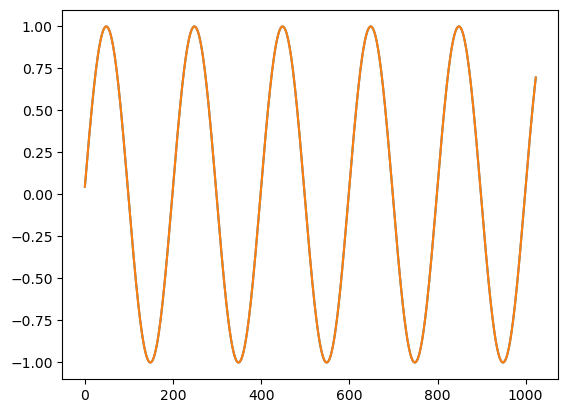

[3.57923954e-10 3.57069582e-10 3.55862784e-10 ... 2.69589906e-10
 2.62030730e-10 2.54212762e-10]


In [17]:
N = 1024
fs = 1e3
f = 5
F = f/fs
order = 4
delta = 1/2

x_padded = 1.0*np.sin(2*np.pi*F*np.arange(N+order))
x_delay = delay_taylor(x_padded, delta, order)[order//2:-order//2]
x_ideal_delay = 1.0*np.sin(2*np.pi*F*(np.arange(N+order//2) - delta))[order//2:]

plt.plot(x_delay)
plt.plot(x_ideal_delay)
plt.show();

error = np.abs(x_delay - x_ideal_delay)
print(error)

2.3531488216321783e-10
1024
[1.85744087e-10 1.81119675e-10 1.76310744e-10 1.71323289e-10
 1.66171965e-10]


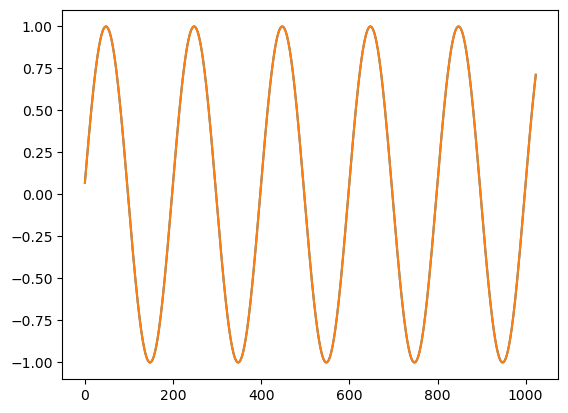

In [3]:
fs = 1e3
f = 5
F = f/fs
N = 1024

delta = 0.25
order = 4
stencil = np.arange(-2, 3, 1)

x_padded = 1.0 * np.sin(2*np.pi*f/fs*np.arange(N+order))

x_shifted_padded = vectorized_taylor_fractional_delay(x_padded, delta, order)
x_shifted = x_shifted_padded[order//2:-order//2]

x_shifted_ideal_padded = 1.0 * np.sin(2*np.pi*f/fs*(np.arange(N+order//2)+delta))
x_shifted_ideal = x_shifted_ideal_padded[order//2:]


error = np.abs(x_shifted_ideal - x_shifted)
print(np.max(error))
print(len(error))
print(error[-5:])
# print(np.max(error[order//2:-(order//2)]))

plt.plot(x_shifted)
plt.plot(x_shifted_ideal);

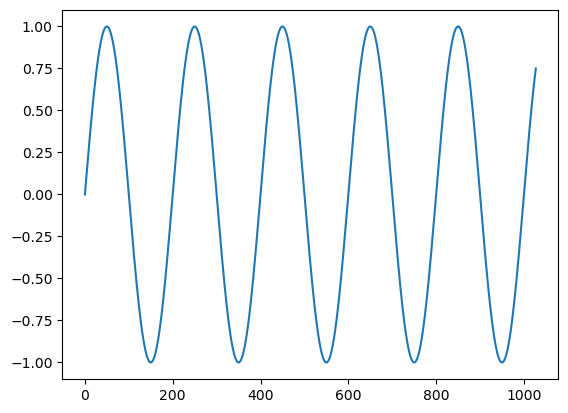

In [5]:
plt.plot(x_padded)

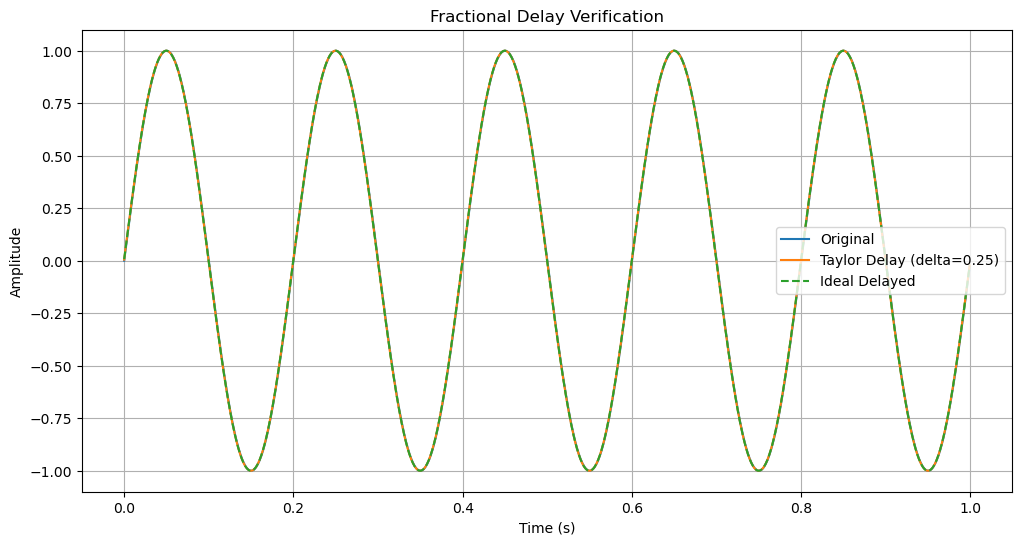

Max Error: 2.792e-03, Mean Error: 4.019e-06


In [6]:


# Test signal (example: sine wave)
fs = 1000  # Sampling frequency (Hz)
T = 1/fs   # Sampling interval
f = 5      # Frequency (Hz)
t = np.arange(1000) * T
Q = np.sin(2 * np.pi * f * t)

# Fractional delay (delta in samples, e.g. T/4 = 0.25)
delta = 0.25
order = 4
stencil = [-2, -1, 0, 1, 2]
N = len(stencil) // 2

# Pad the signal periodically outside the function
Q_shifted = vectorized_taylor_fractional_delay(Q, delta, order, stencil)

# Ideal (continuous) delayed signal
t_shifted = t + delta * T  # Shift time
Q_ideal = np.sin(2 * np.pi * f * t_shifted)

# Error
error = np.abs(Q_shifted - Q_ideal)

# Plot comparison
plt.figure(figsize=(12,6))
plt.plot(t, Q, label="Original")
plt.plot(t, Q_shifted, label=f"Taylor Delay (delta={delta})")
plt.plot(t, Q_ideal, '--', label="Ideal Delayed")
plt.legend()
plt.title("Fractional Delay Verification")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# Check error metrics
max_error = np.max(error)
mean_error = np.mean(error)
print(f"Max Error: {max_error:.3e}, Mean Error: {mean_error:.3e}")


In [13]:
delta = 1/8/32
print(delta**2 *2**16)

1.0
